<a href="https://colab.research.google.com/github/Atoms919/ML_project_diabetes_health_indicator/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#pip install kagglehub[pandas-datasets]

### Importing libraries and the dataset

In [23]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [24]:
file_path = "diabetes_dataset.csv"

# Load the latest version
diabetes = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohankrishnathalla/diabetes-health-indicators-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

diabetes.head()

/tmp/ipython-input-3584600844.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  diabetes = kagglehub.load_dataset(


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### Analysing the data

In this step, we explore the structure and statistics of the diabetes dataset. We display column names, data types, count missing values, and examine summary statistics for each variable. Boxplots of all numerical features help visualize outliers and value ranges. The class distribution plot of the target variable ('diagnosed_diabetes') reveals the level of class imbalance. A correlation heatmap highlights relationships among features and the target.

In [25]:
# Check structure: shape and data types
diabetes.shape
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

Statistical summary for numerical columns

In [26]:
diabetes.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


Check for missing values

In [27]:
print(diabetes.isnull().sum())

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


This code output shows that there are no missing values in any column of the diabetes dataset. This means that each variable is fully observed for all records, so no imputation or removal of data due to missingness is required at this stage. This ensures a straightforward preprocessing pipeline and indicates strong data quality for analysis and modeling.​

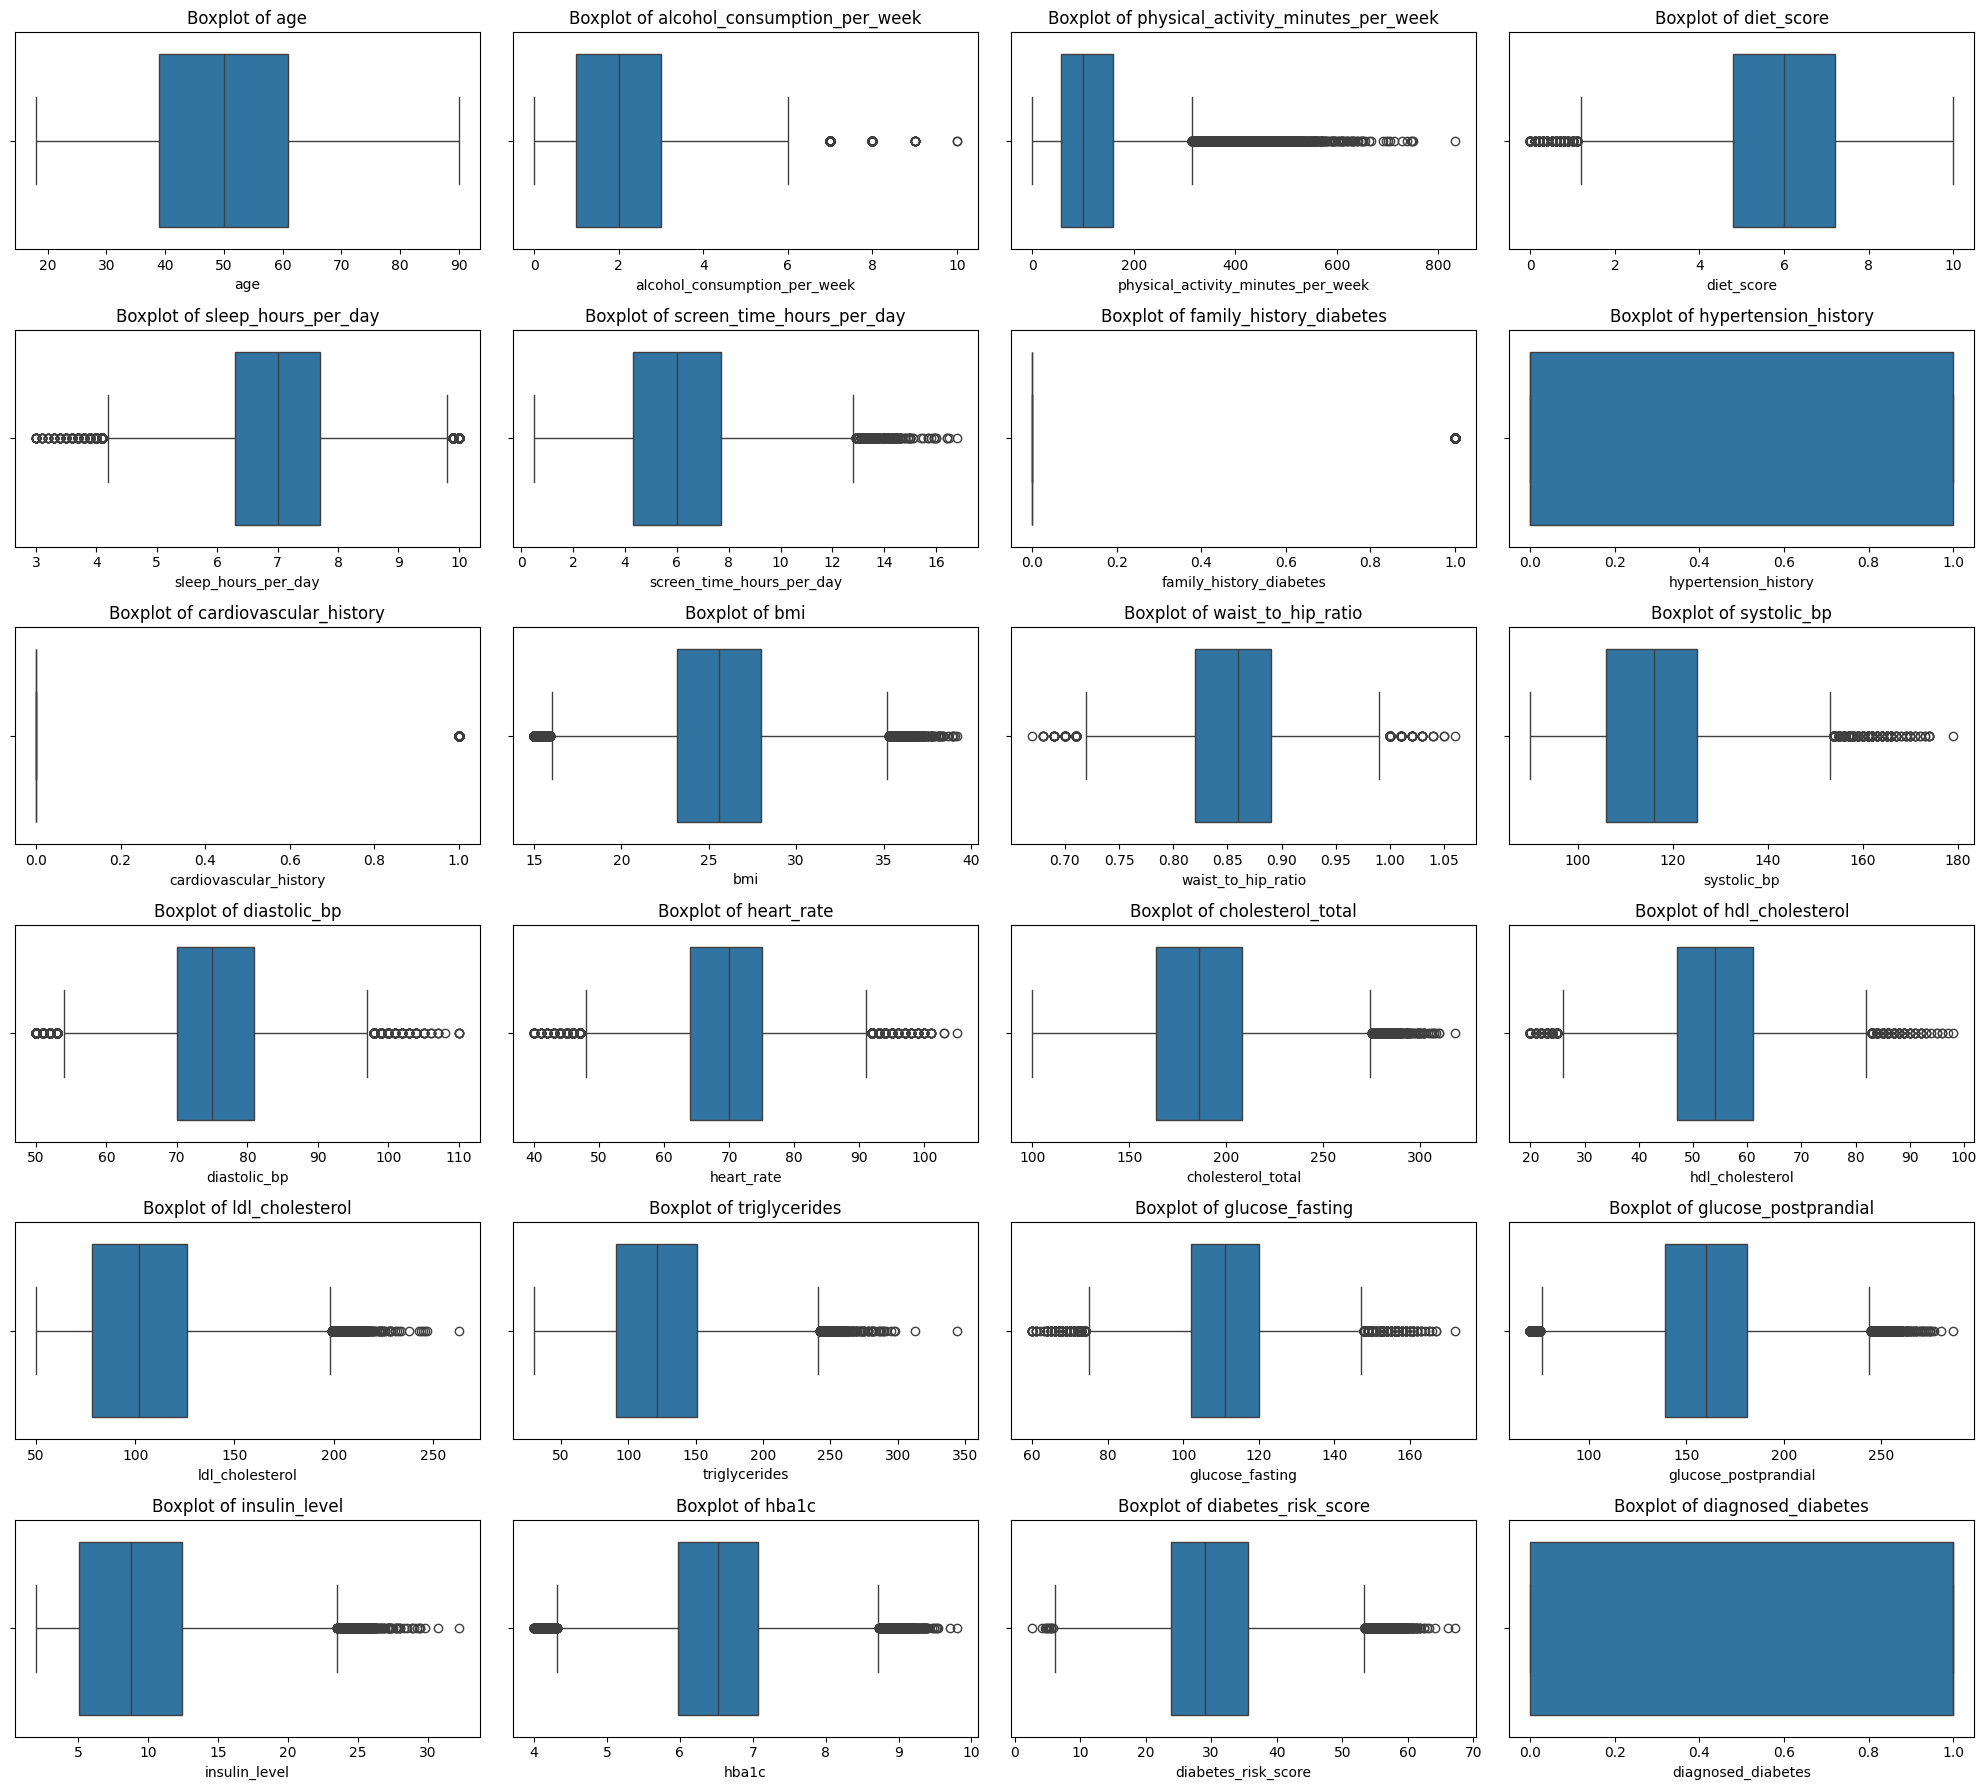

In [28]:
# Check for outliers with boxplots for numerical features
num_cols = diabetes.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 18))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x=diabetes[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Many of the numerical features show the presence of outliers, as indicated by the points beyond the whiskers in the boxplots. This is most prominent in variables such as triglycerides, physical activity, and several cholesterol measures. Outlier detection is crucial at this stage, as it helps inform data cleaning decisions for improving model robustness and performance.

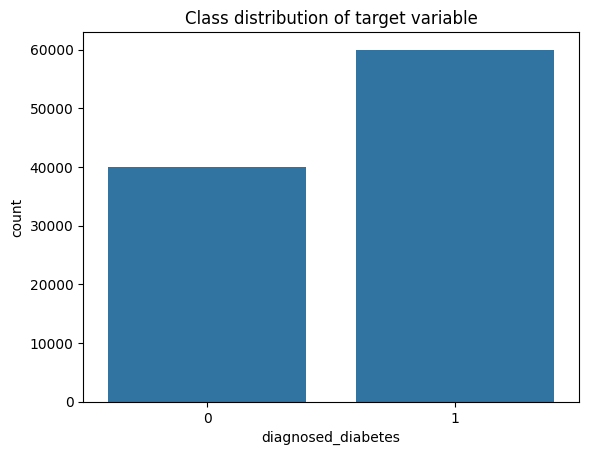

In [29]:
# Target variable distribution
sns.countplot(x='diagnosed_diabetes', data=diabetes)
plt.title('Class distribution of target variable')
plt.show()

The class distribution chart indicates that the dataset contains more diagnosed diabetes cases (class 1) than non-diagnosed cases (class 0). Although the classes are not perfectly balanced, the difference is moderate and should not overly bias most machine learning algorithms. However, this imbalance should be kept in mind, especially when interpreting model performance and considering the use of balanced evaluation metrics like F1-score or recall.

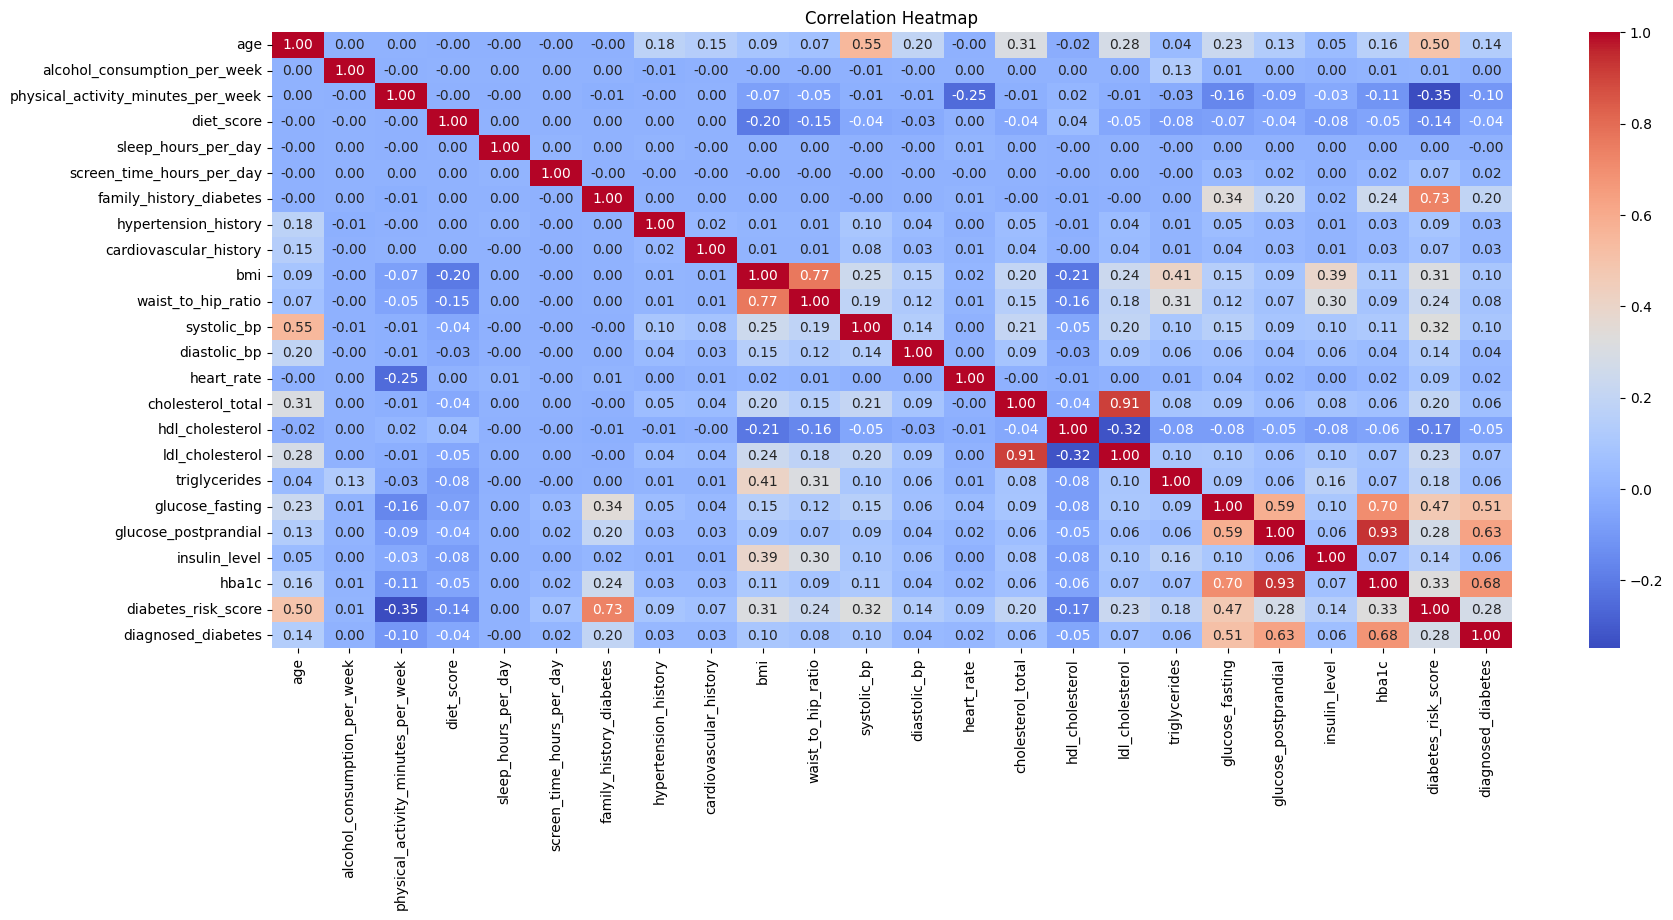

In [30]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
corr_matrix = diabetes.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows relationships among all numerical features and the target in the dataset. Most features have low to moderate correlation with each other, but some, such as systolic and diastolic blood pressure, or glucose-related variables, are strongly correlated. The target variable 'diagnosed_diabetes' displays the highest correlation with features like diabetes_risk_score and hba1c. This information is useful for feature selection and understanding potential multicollinearity issues in predictive modeling.​

Based on the analysis, we address missing values using median imputation. Outliers are visually reviewed for potential removal or capping in further refinement. I encode categorical features and scale all numeric predictors to maintain comparable ranges. The dataset is split into training and testing parts to fairly evaluate model performance.

### Selection of a baseline model and implementation of the model

The objective is supervised binary classification: predict whether an individual is diagnosed with diabetes based on health indicators. The target variable is 'diagnosed_diabetes' (0 = not diabetic, 1 = diabetic). The main evaluation metrics are accuracy, recall, precision, and F1-score. Given mild class imbalance, extra attention is given to recall and F1-score.

In [31]:
# Separate features and target
features = diabetes.drop('diagnosed_diabetes', axis=1)
target = diabetes['diagnosed_diabetes']

# Identify numerical and categorical columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# One-hot encode categorical features
features_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Feature Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Baseline Model: Logistic Regression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12055    12]
 [   11 17922]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12067
           1       1.00      1.00      1.00     17933

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



We selected logistic regression as the baseline model for binary classification, due to its simplicity and interpretability. The model is fit on the training set, and predictions are evaluated on the holdout test set. Metrics and the confusion matrix provide insight into initial performance and possible directions for improvement.

# Grid Search
Apply grid search to establish the optimal configuration of your baseline models.

In [32]:
# Define hyperparameter grid for logistic regression
param_grid = {
    'penalty': ['l2'],
    'C': [1, 10],
    'solver': ['liblinear'],
    'max_iter': [100, 300]
}


# Initialize model
logreg = LogisticRegression()

# Grid search setup
grid_search_lr = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=1,
    error_score='raise'
)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best CV score (Logistic Regression):", grid_search_lr.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   1.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END ...C=10, max_iter=300, penalty=l2, solve

The grid search successfully completed and found the optimal logistic regression settings: regularization parameter C=1, penalty 'l2', solver 'liblinear', and max_iter = 100. The best cross-validated accuracy score is extremely high (0.999), indicating almost perfect classification on this data. This may point to highly separable classes or possibly a very strong predictor in the feature set.

### Applying ensemble models: Voting Bagging or Stacking

In [33]:
# Define base models
clf1 = LogisticRegression(max_iter=500)
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = SVC(kernel='linear')

voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
print("Voting Ensemble Accuracy:", voting_clf.score(X_test, y_test))

Voting Ensemble Accuracy: 0.9993666666666666


In [34]:
# Bagging logistic regression
bagging = BaggingClassifier(
    estimator=LogisticRegression(max_iter=500),
    n_estimators=10,
    random_state=42
)
bagging.fit(X_train, y_train)
print("Bagging Ensemble Accuracy:", bagging.score(X_test, y_test))

Bagging Ensemble Accuracy: 0.9991


In [35]:
# Define base estimators and final estimator
estimators = [
    ('lr', LogisticRegression(max_iter=500)),
    ('dt', DecisionTreeClassifier(max_depth=5))
]
final_est = SVC(kernel='linear', probability=True)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_est,
    cv=3
)
stacking.fit(X_train, y_train)
print("Stacking Ensemble Accuracy:", stacking.score(X_test, y_test))

Stacking Ensemble Accuracy: 0.9995333333333334


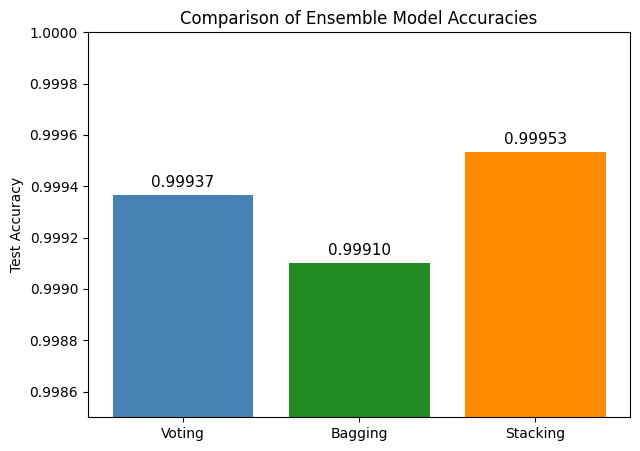

In [36]:
import matplotlib.pyplot as plt

# Model names and test accuracies from your results
models = ['Voting', 'Bagging', 'Stacking']
accuracies = [voting_clf.score(X_test, y_test), bagging.score(X_test, y_test), stacking.score(X_test, y_test)]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracies, color=['steelblue', 'forestgreen', 'darkorange'])
plt.ylim(0.9985, 1.0)
plt.ylabel('Test Accuracy')
plt.title('Comparison of Ensemble Model Accuracies')

# Annotate bar heights
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.00002, f'{acc:.5f}',
             ha='center', va='bottom', fontsize=11)

plt.show()

All three ensemble models: Voting, Bagging, and Stacking were fitted and evaluated. Each achieved extremely high test accuracy (greater than 0.999), indicating very strong predictive performance on the diabetes dataset.

AI has been used to assist with both coding and analyzing the results throughout this project, ensuring code quality and robust interpretation of findings.